# Learning a CNN for Image Classification

* Based on [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition?gclid=CjwKCAjw9aiIBhA1EiwAJ_GTSlKgxc4qopKHPsFWryOoTz7fvhvhzYSjEsgQ-bG1R51QSGppISywpBoClcIQAvD_BwE) by Francois Chollett

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators so that the 
# results will be the same every time the notebook is run
keras.utils.set_random_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Let's create a little Python list so that we can go from numbers to descriptions easily. 

In [3]:
labels = ["T-shirt/top", 
          "Trouser", 
          "Pullover",
          "Dress", 
          "Coat",
          "Sandal", 
          "Shirt", 
          "Sneaker", 
          "Bag", 
          "Ankle boot"]  

We will reuse the functions from the previous colab to minimize typing.

In [4]:
def plot_loss_curves(history):
  plt.clf()
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [5]:
def plot_acc_curves(history):
  plt.clf()
  history_dict = history.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

## A Convolutional Neural Network




### Convolutional Layers



Convolutional (typically abbreviated to "conv") layers were the key breakthrough that led to all the exciting advances in AI for Computer Vision problems like Image Classification, Image Recognition etc. They were designed to specifically work with images.

Conv layers are the reason why your iPhone can recognize your face! 

We will follow the same sequence of steps as we did above:


*   Data Prep
*   Define Model
*   Set Optimization Parameters
*   Train Model
*   Evaluate Model


### Data Prep


As we did before, let's normalize to the 0-1 range by dividing everything by 255.

In [6]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [7]:
x_train.shape

(60000, 28, 28)

For reasons that will become clear later when we work with color images, we also need to add another dimension to each example so that it goes from 28x28 to 28x28x1

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

### Define Model

OK, we are ready to create our very first **Convolutional Neural Network (CNN)!**



In [11]:
# input layer
input = keras.Input(shape=x_train.shape[1:])

#
# the first convolutional block
#
# convolutional layer
x = keras.layers.Conv2D(32,                    # Number of filters
                        kernel_size=(2, 2),    # The shape of each filter
                        activation="relu", 
                        name="Conv_1")(input) 
# pooling layer
x = keras.layers.MaxPool2D()(x) 
# end of first convolutional block

#
# the second convolutional block
#
# convolutional layer
x = keras.layers.Conv2D(32,                    # Number of filters
                        kernel_size=(2, 2),    # The shape of each filter
                        activation="relu", 
                        name="Conv_2")(x) 
# pooling layer
x = keras.layers.MaxPool2D()(x) 
# end of second convolutional block

# flatten layer
x = keras.layers.Flatten()(x)

# fully-connected (dense) ReLU layer
x = keras.layers.Dense(256, activation="relu")(x)   

# output softmax layer
output = keras.layers.Dense(10, activation="softmax")(x)


model = keras.Model(input, output)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv_1 (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 Conv_2 (Conv2D)             (None, 12, 12, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

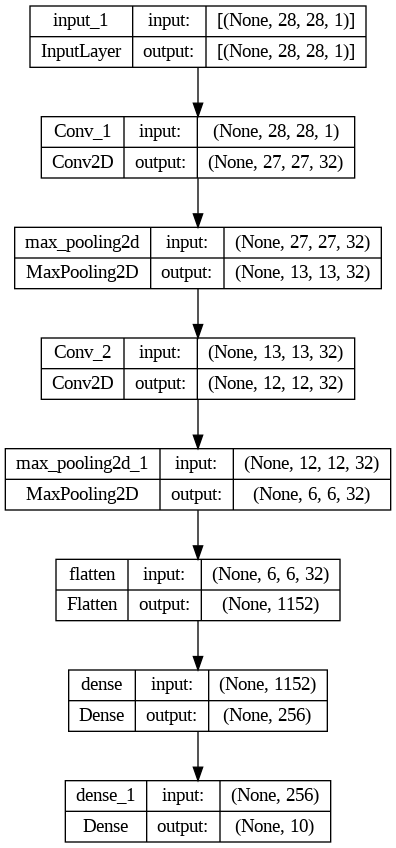

In [13]:
keras.utils.plot_model(model, show_shapes=True)

### Set Optimization Parameters

Same as before ....

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Train the Model

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=64, 
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 14s 5ms/step - loss: 0.5087 - accuracy: 0.8158 - val_loss: 0.3703 - val_accuracy: 0.8704
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3379 - accuracy: 0.8791 - val_loss: 0.3216 - val_accuracy: 0.8832
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2885 - accuracy: 0.8938 - val_loss: 0.2899 - val_accuracy: 0.8925
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2610 - accuracy: 0.9034 - val_loss: 0.2761 - val_accuracy: 0.8978
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2369 - accuracy: 0.9120 - val_loss: 0.2807 - val_accuracy: 0.8977
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2146 - accuracy: 0.9197 - val_loss: 0.2583 - val_accuracy: 0.9050
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.1983 - accuracy: 0.9254 - val_loss: 0.2380 - val_accuracy: 0.9140
Epoch

As usual, let's plot the loss and accuracy curves

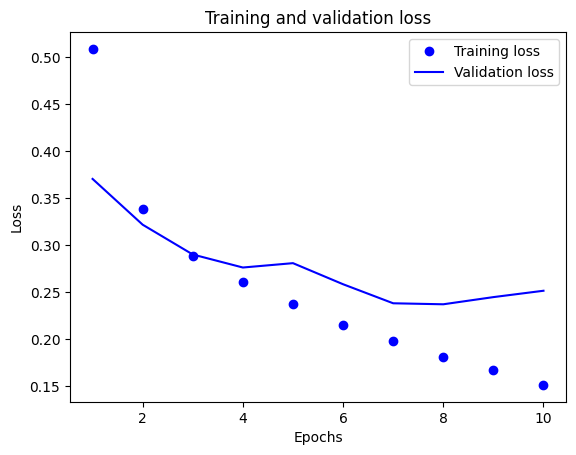

In [16]:
plot_loss_curves(history)

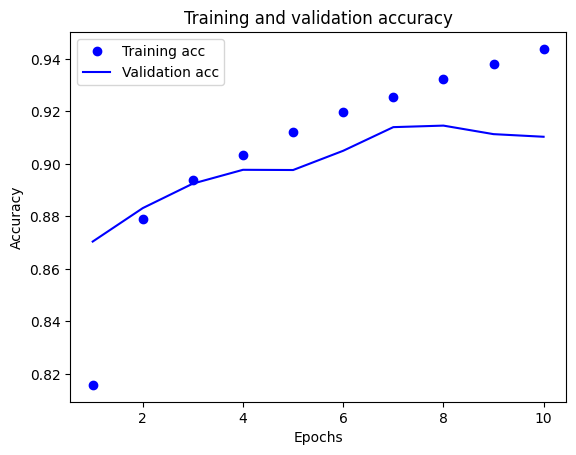

In [17]:
plot_acc_curves(history)

The validation loss/accuracy are flattening out but not increasing yet so we can just go forward with this model.

### Evaluate the Model

In [19]:
score = model.evaluate(x_test, y_test)
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.9037
Test accuracy: 0.9036999940872192


**Excellent! We got to over 90% accuracy on the test set - nice.**




> Using two **specialized layers - the convolutional and pooling layers -** helped us exceed 90%.



Back to Fashion MNIST. Let's see what the **[state of the art (SOTA)](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)** accuracy is.

It is **96.91%**!

<br>


**Challenge: Can you get to SOTA by playing around with the architecture of the network?** Add more convolutional layers, change the size of each convolutional filter etc.



## Iteratively Improving the Model 

> **Practical Tip**: Once any model is built, it is a good idea to look at the predictions on the test set and see what types of examples the model has difficulty predicting. That can often suggest ways in which the model can be improved.

For problems where the input data consists of *images* (like Fashion MNIST), **visualization** can be very helpful.


In [20]:
# get the predictions
y_hat = np.argmax(model.predict(x_test), axis=1)

# collect examples where the model made a mistake
misses = np.where(y_hat != y_test)

313/313 [==============================] - 1s 2ms/step


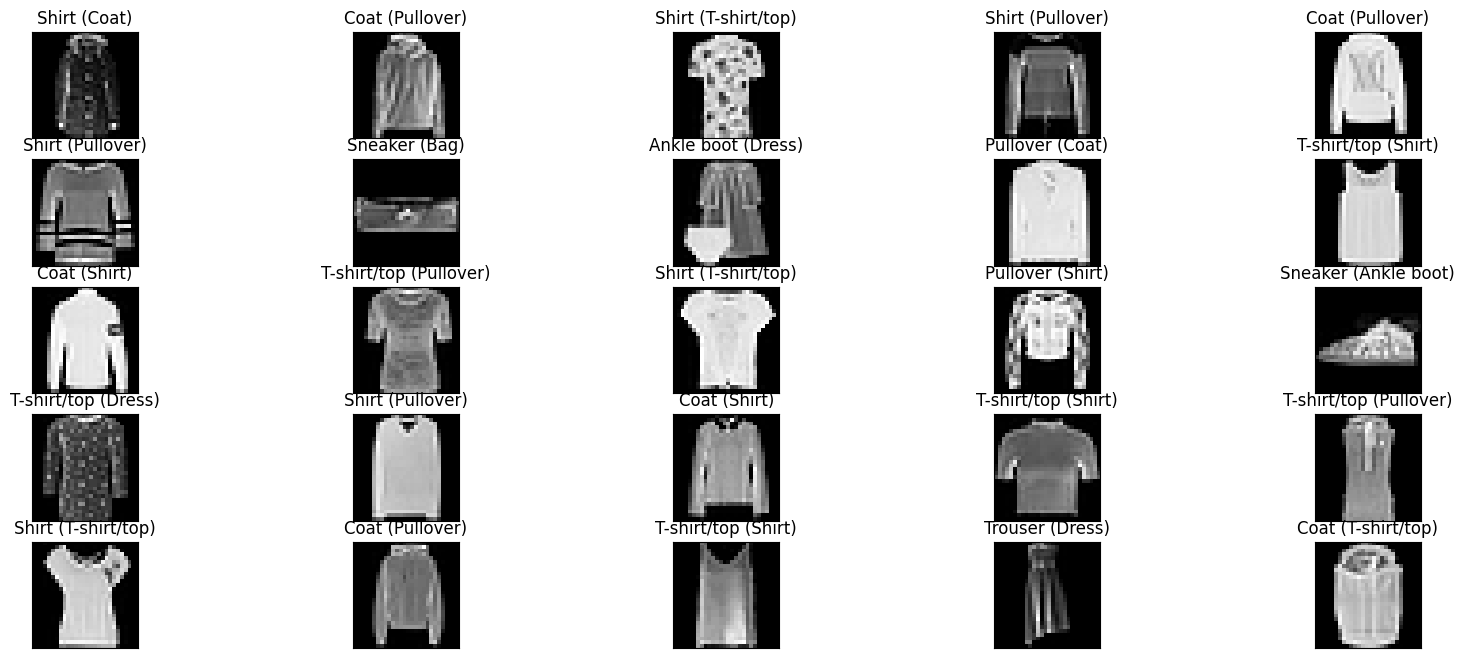

In [21]:
# Plot a random sample of 25 test images incorrectly classified by the model, 
# their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(misses[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap="gray")
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[y_hat[index]], 
                                  labels[y_test[index]]))

You can see that the model seems to be having difficulty distinguishing between *visually similar* categories.

The **confusion matrix** is a good way to get a complete picture of this phenomenon.

In [22]:
actuals = [labels[i] for i in y_test]
predictions = [labels[i] for i in y_hat]

In [23]:
df = pd.DataFrame({'Predictions': predictions, 'Actuals': actuals})
pd.crosstab(df.Predictions, df.Actuals)

Actuals,Ankle boot,Bag,Coat,Dress,Pullover,Sandal,Shirt,Sneaker,T-shirt/top,Trouser
Predictions,,,,,,,,,,
Ankle boot,960,0,0,1,0,11,0,20,1,0
Bag,0,987,3,8,0,3,11,2,5,1
Coat,0,2,933,56,86,0,107,0,4,4
Dress,0,2,10,834,5,0,13,0,6,5
Pullover,0,1,21,11,829,0,49,0,22,0
Sandal,3,1,0,0,0,959,0,4,1,0
Shirt,0,3,32,35,58,0,695,0,80,3
Sneaker,36,1,0,0,0,27,0,974,0,0
T-shirt/top,1,3,0,41,21,0,124,0,881,2


**Observations**

*   All the off-diagonal numbers represent mistakes made by the model. 
*   You can see that the model made the most mistakes for "Shirts". It confused a "Shirt" for a "T-shirt/Top" often. This is understandable since the products are visually similar. 



---
**How can we improve the model?**

> **Tip**: Get more data on those categories that the model has difficulty distinguishing between (e.g., Shirts and T-Shirts), enrich the original training dataset with these new examples and re-train the model.




## Conclusion

We have built a Deep Learning model that can classify grayscale images of clothing items with over 90% accuracy!!


In the [next colab](https://colab.research.google.com/drive/18TNYD4_5a2PA3UTPOc4j2RNBFrofuk_T), we will discuss:
* How to work with color images
* A general strategy - **transfer learning** - for solving problems in practice
* Apply the general strategy to build a handbags/shoes classifier with just 100 examples!

**DONE**

